<center> <h1>RESULTADOS</h1></center>

In [13]:
import os
from skimage import io
import matplotlib as plt
import numpy as np
import pandas as pd
import base64
from IPython.display import display, Javascript
from IPython.display import display, HTML
from IPython.utils.py3compat import str_to_bytes, bytes_to_str

Se realizaron un total de 66 pruebas, 22 por cada nivel de ZOOM y 11 por cada configuracion de ZOOM.<br/>
**Ejemplo:** Para el ZOOM 13 COMPOUND se realizaron 11 pruebas, cada una variando parametros como el modelo, batch_size o epoch.

* Nieveles y Configuraciones de OVERLAECOBO:
    * 13_SIMPLE
    * 13_COMPOUND
    * 14_SIMPLE
    * 14_COMPOUND
    * 15_SIMPLE
    * 15_COMPOUND

In [72]:
PATH_PRUEBAS = "./TEST WITHOUT BACKGROUND"
pruebas = pd.read_csv(PATH_PRUEBAS+"/pruebas.csv")
pruebas

,PRUEBA,RED,EPOCH,BATCH_SIZE
0,1,FC-DenseNet56,50,1
1,2,FC-DenseNet56,70,1
2,3,Encoder-Decoder,70,1
3,4,Encoder-Decoder,70,2
4,5,Encoder-Decoder-Skip,70,1
5,6,Encoder-Decoder-Skip,70,2
6,7,FRRN-A,70,1
7,8,MobileUNet,70,1
8,9,MobileUNet,70,2
9,10,MobileUNet-Skip,70,1


## 1. Archivos Framework

In [97]:
ZOOM = "15_COMPOUND"
PRUEBA = 11

In [99]:
href_train = PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/train.txt"
href_test  = PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/test.txt"
src_1 =      PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/accuracy_vs_epochs.png"
src_2 =      PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/loss_vs_epochs.png"
src_test =   PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/0_gt.png"
src_label = "../data/dataset/OVERLAECOBO/WITHOUT BACKGROUND/OVERLAECOBO_"+ZOOM[:2]+"/LABEL/val_labels/0.png"
html = """<center><h1> {ZOOM} PRUEBA: {PRUEBA} </h1></center>
          <h3>1. TRAIN FILE</h3></br><a href='{href_train}'>Train file</a>
          <h3>2. SCORE IMAGE</h3>
          <img src='{src_1}'/>
          <h3>3. LOSS IMAGE</h3>
          <img src='{src_2}'/>
          <h3>4. TEST FILE</h3>
          </br><a href='{href_test}'>Test file</a>
          <h3>5. TEST IMAGES</h3>
          <div style="width:100%; text-align: center; ">
           <div style="width:40%; display: inline-block" >
            PREDICT
            <img src='{src_test}'/>
           </div>
           <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
             TARGET
             <img src='{src_label}'/>
           </div>
          
          </div>
          """
display( HTML(html.format(href_train=href_train,src_1=src_1, src_2=src_2,ZOOM=ZOOM,PRUEBA=PRUEBA,href_test=href_test,src_test=src_test, src_label=src_label)))
resultados_val =  pd.read_csv(PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/val_scores.csv")
resultados_val

,val_name,avg_accuracy,precision,recall,f1 score,mean iou,Estrato_1,Estrato_2,Estrato_3,Estrato_4,Estrato_5,Estrato_6,No_Definido
0,0,0.282349,0.766317,0.282349,0.401162,0.120896,0.003899,1.0,0.793023,0.013437,0.003573,0.000790,0.999148
1,1,0.290939,0.362276,0.290939,0.321166,0.167709,0.013158,1.0,1.000000,0.076701,0.003860,0.003165,0.997586
2,10,0.887741,0.925910,0.887741,0.898568,0.440340,0.015038,1.0,0.967037,0.474758,0.002000,1.000000,0.997820
3,11,0.627899,0.716930,0.627899,0.645235,0.258642,0.000000,1.0,0.690329,0.313504,0.018395,1.000000,0.998710
4,12,0.283401,0.647719,0.283401,0.339551,0.127845,0.000000,1.0,0.505909,0.038466,0.000400,0.035264,0.998656
5,13,0.804260,0.796911,0.804260,0.796014,0.299205,0.377510,1.0,1.000000,1.000000,0.004237,0.051422,0.997427
6,14,0.808548,0.790647,0.808548,0.791512,0.369121,0.112717,1.0,1.000000,1.000000,0.000000,1.000000,0.998952
7,15,0.708511,0.882103,0.708511,0.701019,0.241112,0.020161,1.0,0.775634,0.145587,0.000000,1.000000,0.997705
8,16,0.574463,0.768063,0.574463,0.617218,0.231334,0.000000,1.0,0.592944,0.126996,0.003145,1.000000,0.999796
9,17,0.408035,0.697903,0.408035,0.491984,0.153629,0.000000,1.0,0.579107,0.041910,0.021987,1.000000,0.999546


## 2. Buscando la mejor red

## 3. Verdadero Iou (Prueba)

## 4. % de Clases en cada Zoom
Tanto target como predict

In [ ]:

    Presicion por clase
    IoU Por Clase
    Presicion Media
    IoU Media
    Como el framework esta calculando esas medidas.
    Tiempo entrenando


# 4. Presicion por clase

### 4.1. con el NEW LABELS no identifica entre estrato 1 y 2

In [255]:
class_dict = pd.read_csv("../data/dataset/OVERLAECOBO/class_dict.csv")
class_dict

,name,r,g,b
0,Estrato_1,255,1,1
1,Estrato_2,225,255,1
2,Estrato_3,1,255,255
3,Estrato_4,1,255,1
4,Estrato_5,255,127,0
5,Estrato_6,2,128,2
6,No_Definido,192,192,192


In [256]:
Estrato_1 = class_dict.get_values()[0][1:]
Estrato_2 = class_dict.get_values()[1][1:]
Estrato_3 = class_dict.get_values()[2][1:]
Estrato_4 = class_dict.get_values()[3][1:]
Estrato_5 = class_dict.get_values()[4][1:]
Estrato_6 = class_dict.get_values()[5][1:]
no_definido = class_dict.get_values()[6][1:]

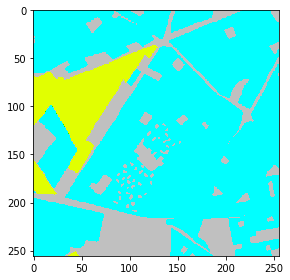

In [257]:
img_new_labels = io.imread("../data/dataset/OVERLAECOBO/WITH BACKGROUND/OVERLAECOBO_15/LABEL/val_labels/30.png")
io.imshow(img_new_labels)

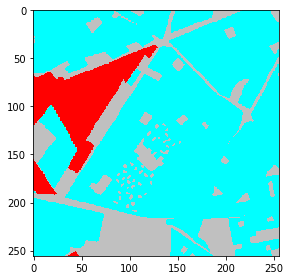

In [103]:
img_predict = io.imread("TEST WITHOUT BACKGROUND/15_SIMPLE/prueba_11/Val/30_gt.png")
io.imshow(img_predict)